In [13]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk65 import rk_error_control

In [14]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

def plot_shape_of_errors(continuous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continuous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name} - plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [15]:
def tol_experiment(tol, model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    (   res, 
        crk6_continous_sol,
        hb6_continous_sol,
        hb8_continous_sol  ) = rk_error_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp


    crk6_computed_solutions = [crk6_continous_sol.eval(x) for x in t_eval]
    hb6_computed_solutions = [hb6_continous_sol.eval(x) for x in t_eval]
    hb8_computed_solutions = [hb8_continous_sol.eval(x) for x in t_eval]
    actual_solutions = solution(t_eval)

    # plt.figure()
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    # plt.plot(t_eval, crk6_computed_solutions, label="crk6")
    # plt.plot(t_eval, hb6_computed_solutions, label="hb6")
    # plt.plot(t_eval, hb8_computed_solutions, label="hb8")
    # plt.plot(t_eval, actual_solutions, label="solution")
    # plt.title("solution vs interpolants")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    crk6_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk6_computed_solutions, actual_solutions)]
    hb6_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb6_computed_solutions, actual_solutions)]
    hb8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb8_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, crk6_error, label="crk6 error")
    plt.plot(t_eval, hb6_error, label="hb6 error")
    plt.plot(t_eval, hb8_error, label="hb8 error")
    plt.title(f"global error at tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # plot_shape_of_errors(crk6_continous_sol, solution, "crk6")
    # plot_shape_of_errors(hb6_continous_sol , solution, "hb6")
    # plot_shape_of_errors(hb8_continous_sol , solution, "hb8")

    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

def experiment(model, y0, tspan, solution):
    for tol in [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12]:
        tol_experiment(tol, model, y0, tspan, solution)

nsteps = 7
nsuccessful_steps = 7
integration complete


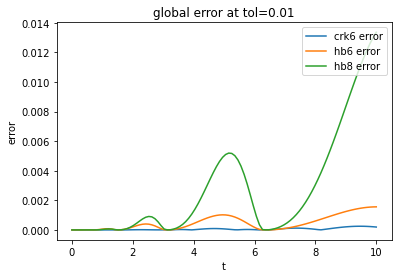

0.0
2.081779193474631e-12
3.9339442814423364e-10
3.026423445184889e-08
7.664228858228483e-07
5.347302044211855e-06
8.620386116875434e-06
7.389230917365097e-06
nsteps = 11
nsuccessful_steps = 11
integration complete


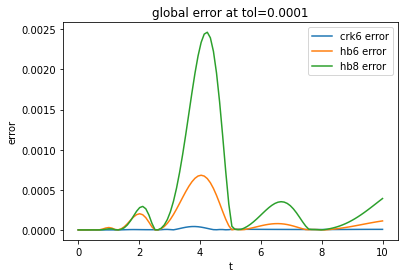

0.0
6.661338147750939e-16
3.1086244689504383e-15
1.1879386363489175e-14
1.1302070390684094e-13
3.7535863306459305e-11
4.439370759889982e-09
1.927218735708891e-07
2.468240161590529e-06
8.15904759515762e-06
4.98996883568914e-06
4.132437210702111e-06
nsteps = 17
nsuccessful_steps = 17
integration complete


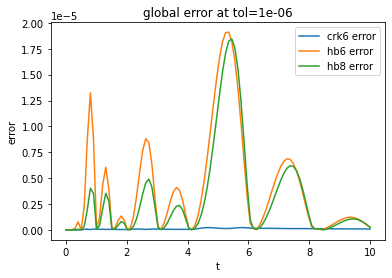

0.0
0.0
2.220446049250313e-16
3.3306690738754696e-16
4.440892098500626e-16
1.3322676295501878e-15
6.661338147750939e-15
3.3306690738754696e-15
6.208478176006338e-12
9.865982475432133e-10
6.158271947942495e-08
4.867991398871396e-08
3.757573019402827e-08
6.44861877785452e-08
4.925646951425833e-08
1.5888999560509376e-07
1.160264726518534e-07
8.657258854238847e-08
nsteps = 39
nsuccessful_steps = 32
integration complete


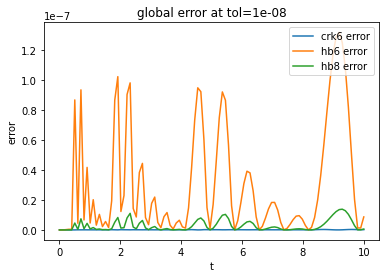

0.0
1.1102230246251565e-16
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-15
4.440892098500626e-15
1.9872992140790302e-14
9.944267631567527e-13
1.2794210135780304e-12
1.3243850460753492e-12
5.059219709835361e-11
5.6305404783074664e-11
5.248323997619764e-11
4.7075565667853425e-11
4.19161372278154e-11
3.737665732472806e-11
9.463685390898036e-11
9.525624733441873e-11
8.57142135046729e-11
7.549677549789635e-11
6.649997219554393e-11
5.891265253410438e-11
1.0989820165008268e-10
1.0630979430104048e-10
9.423367641758773e-11
8.235873094619706e-11
7.219119746437741e-11
1.7071155600234533e-10
1.6359980037350397e-10
nsteps = 78
nsuccessful_steps = 59
integration complete


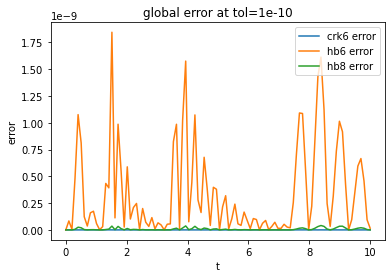

0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
2.220446049250313e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
4.440892098500626e-16
7.771561172376096e-16
4.440892098500626e-15
8.881784197001252e-16
2.9976021664879227e-15
6.661338147750939e-15
8.992806499463768e-15
3.241851231905457e-14
4.218847493575595e-14
4.4075854077618715e-14
2.964295475749168e-14
1.7763568394002505e-14
8.659739592076221e-15
1.1102230246251565e-15
1.0547118733938987e-14
1.8207657603852567e-14
2.142730437526552e-14
2.4980018054066022e-14
2.3314683517128287e-14
2.808864252301646e-14
4.3853809472693683e-14
5.517808432387028e-14
5.939693181744587e-14
5.995204332975845e-14
5.6288307348495437e-14
4.440892098500626e-14
3.4861002973229915e-14
2.8310687127941492e-14
2.3869795029440866e-14
1.84297022087776e-14
1.2656542480726785e-14
7.16093850883226e-15
2.7200464103316335e-15
6.361577931102147e-14
8.104628079763643e-14
8.143485885625523e-14
8.110179194886769e-14
7.155387393709134e-14
6.589173651150304e

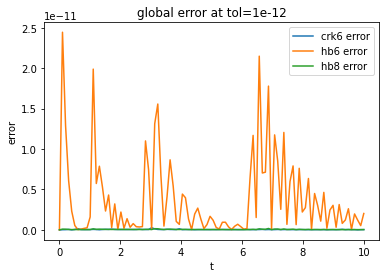

0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
1.1102230246251565e-16
0.0
3.3306690738754696e-16
5.551115123125783e-16
1.7763568394002505e-15
7.549516567451064e-15
1.199040866595169e-14
1.765254609153999e-14
2.2426505097428162e-14
2.375877272697835e-14
2.8199664825478976e-14
2.853273173286652e-14
3.042011087472929e-14
3.26405569239796e-14
3.375077994860476e-14
3.497202527569243e-14
3.7636560534792807e-14
3.941291737419306e-14
4.1300296516055823e-14
4.1522341120980855e-14
4.2521541843143495e-14
4.118927421359331e-14
4.163336342344337e-14
4.163336342344337e-14
4.374278717023117e-14
4.285460875053104e-14
4.207745263329343e-14
4.0190073491430667e-14
4.0523140398818214e-14
4.063416270128073e-14
4.085620730620576e-14
4.107825191113079e-14
4.163336342344337e-14
4.18554080283684e-14
4.296563105299356e-14
4.574118861455645e-14
4.5852210917018965e-14
4.829470157119431

In [16]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 8
nsuccessful_steps = 8
integration complete


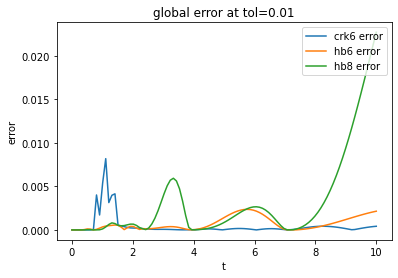

0.0
6.623734893906885e-11
9.759217767246753e-09
2.082435943684402e-07
0.0005482541127290186
0.00014949763551258544
1.811513619190408e-05
1.7704149281705384e-05
5.799894134328031e-05
nsteps = 16
nsuccessful_steps = 14
integration complete


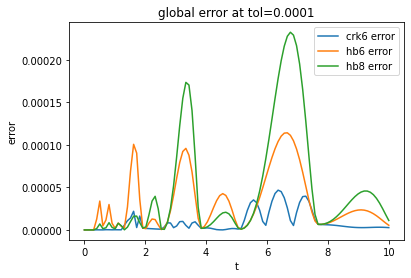

0.0
0.0
2.220446049250313e-16
4.551914400963142e-14
9.621969887518844e-12
1.321170395307547e-09
3.545891258394107e-08
1.5889836713078864e-07
1.330111498720754e-07
2.1768169529701176e-06
8.280617130318468e-07
1.8853719745692832e-06
7.907913226815055e-07
6.570421974428503e-06
2.206064686597481e-06
nsteps = 30
nsuccessful_steps = 25
integration complete


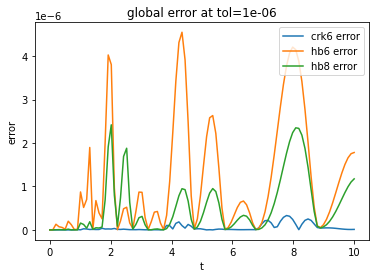

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
7.549516567451064e-15
1.7135182162064666e-12
2.786937347565299e-10
3.2996383403371965e-10
1.9824419883462951e-10
9.367950859484608e-12
1.7617107772593954e-10
2.571962642861081e-10
1.508396940685941e-08
1.2771786128684681e-08
8.651968586015357e-09
1.743854655122945e-08
7.570919571819879e-09
3.824964373011497e-09
2.2093195051198222e-09
2.018491148531032e-08
1.0451402285283073e-08
5.492699749892749e-09
4.267191362067324e-08
1.9888382576244146e-08
nsteps = 62
nsuccessful_steps = 47
integration complete


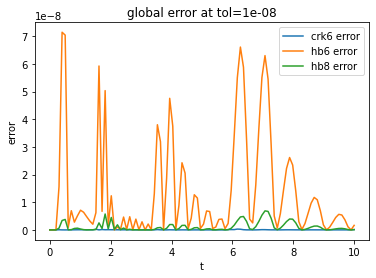

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
0.0
1.4432899320127035e-15
3.040900864448304e-13
5.588862705963038e-13
7.508438315539934e-13
8.741896095898483e-13
1.7416290631899756e-11
8.228639991614273e-12
1.625977130714773e-11
1.4946599513621095e-11
1.3699374967757194e-11
3.7726044510577594e-11
5.064870745030703e-11
5.4300897112113944e-11
5.213551812488504e-11
4.700440037197495e-11
4.091710303910645e-11
3.4958924644001854e-11
2.956446198965068e-11
9.0925988960322e-11
8.026299069818776e-11
6.131858909519394e-11
4.587899504748805e-11
3.452912955559384e-11
2.6341845371646855e-11
2.0396323519022985e-11
1.5991777346791025e-11
1.2703837981575816e-11
1.2990220010777875e-11
1.193405790855806e-11
9.984006676955204e-12
7.983814998002714e-12
6.2701441261303614e-12
4.904882056067095e-12
2.7161023430366527e-11
2.6368789096675727e-11
2.0833609143400267e-11
1.5611159934203478e-11
1.1591293896939803e-11
3.177308503105047

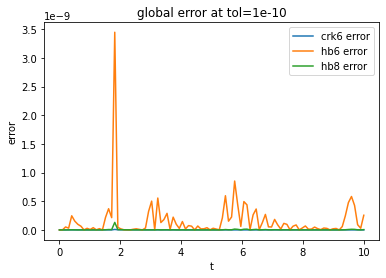

0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
4.440892098500626e-16
7.771561172376096e-16
1.2212453270876722e-15
1.887379141862766e-15
3.219646771412954e-15
3.3306690738754696e-15
4.9960036108132044e-15
3.630429290524262e-14
5.873079800267078e-14
7.394085344003543e-14
8.060219158778636e-14
7.915890165577366e-14
7.194245199571014e-14
7.105427357601002e-14
5.595524044110789e-14
5.206945985491984e-14
4.96269692007445e-14
4.374278717023117e-14
2.6756374893466273e-14
2.8310687127941492e-14
1.9761969838327786e-14
1.2323475573339238e-14
5.218048215738236e-15
2.220446049250313e-15
9.992007221626409e-15
2.55351295663786e-14
2.142730437526552e-14
2.653433028854124e-14
3.47499806707674e-14
3.47499806707674e-14
3.9745984281580604e-14
3.885780586188048e-14
4.723998969780041e-14
4.951594689828198e-14
5.4289905904170155e-14
9.331424521974441e-14
1.7846835120849391e

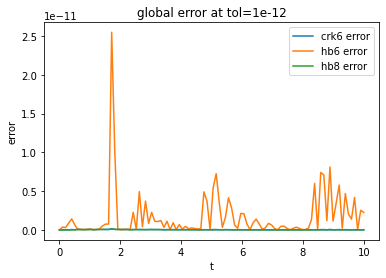

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
3.3306690738754696e-16
4.440892098500626e-16
4.440892098500626e-16
3.3306690738754696e-16
5.551115123125783e-16
9.992007221626409e-16
1.2212453270876722e-15
1.5543122344752192e-15
2.55351295663786e-15
3.3306690738754696e-15
3.885780586188048e-15
4.218847493575595e-15
5.10702591327572e-15
5.773159728050814e-15
6.661338147750939e-15
7.549516567451064e-15
8.548717289613705e-15
9.547918011776346e-15
1.1213252548714081e-14
1.3211653993039363e-14
1.454392162258955e-14
1.609823385706477e-14
1.6986412276764895e-14
1.9761969838327786e-14
2.19824158875781e-14
2.1316282072803006e-14
2.2093438190040615e-14
2.375877272697835e-14
2.5757174171303632e-14
2.731148640577885e-14
2.808864252301646e-14
2.986499936241671e-14
3.07531777821168

In [17]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 7
nsuccessful_steps = 7
integration complete


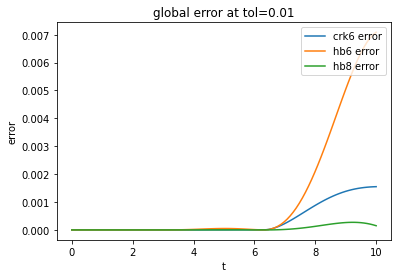

0.0
2.6645352591003757e-15
4.6629367034256575e-15
1.3589129821411916e-13
1.0864642518981782e-12
1.3946555021959739e-09
1.575844690293593e-06
0.0015191629208182178
nsteps = 12
nsuccessful_steps = 11
integration complete


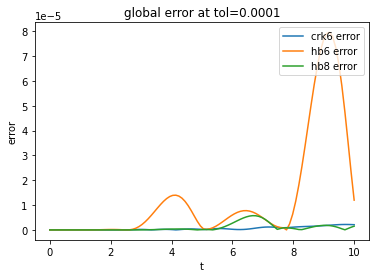

0.0
0.0
2.220446049250313e-16
6.661338147750939e-16
3.552713678800501e-15
8.659739592076221e-15
3.730349362740526e-14
5.795364188543317e-13
1.4567302919488156e-10
1.7386914930028752e-07
8.592525260198158e-07
2.0185281908169372e-06
nsteps = 24
nsuccessful_steps = 19
integration complete


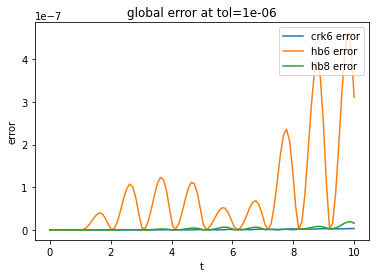

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
0.0
3.9968028886505635e-15
9.769962616701378e-15
4.063416270128073e-14
1.9317880628477724e-13
9.887424212706719e-12
6.372591343506429e-11
1.8968560056009665e-10
4.203832837390564e-10
7.836171711517181e-10
1.2875558397240638e-09
1.8958514758082856e-09
2.52333176575803e-09
3.045641960852663e-09
nsteps = 47
nsuccessful_steps = 32
integration complete


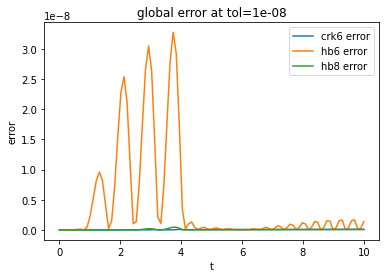

0.0
0.0
0.0
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
2.220446049250313e-16
0.0
2.220446049250313e-16
5.10702591327572e-15
1.4210854715202004e-14
6.59472476627343e-14
7.434053372890048e-13
3.3513192221334975e-12
1.4855228158694445e-11
3.6281200266330416e-11
3.907674184233656e-11
4.2017500589963674e-11
4.5007997329093996e-11
4.793276886516651e-11
5.118350188126897e-11
5.4430238094482775e-11
5.7707616463176237e-11
6.111289252430652e-11
6.436895461092718e-11
6.750422443246862e-11
7.042544325486233e-11
7.316280914437812e-11
7.558753623015946e-11
7.775113886054896e-11
7.958611547564942e-11
nsteps = 88
nsuccessful_steps = 58
integration complete


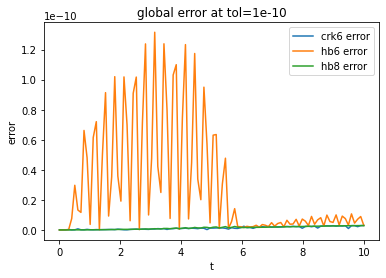

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.220446049250313e-16
0.0
0.0
0.0
2.220446049250313e-16
2.886579864025407e-15
2.19824158875781e-14
5.861977570020827e-14
1.0547118733938987e-13
1.4210854715202004e-13
2.2115642650533118e-13
3.170796958329447e-13
3.4283687000424834e-13
4.036770917537069e-13
5.440092820663267e-13
5.981881656680343e-13
7.753797603982093e-13
8.5087492607272e-13
9.889866703360894e-13
1.1217693440812582e-12
1.2541079286165768e-12
1.2856382625159313e-12
1.383337888682945e-12
1.5307755063531658e-12
1.6044943151882762e-12
1.6555645743210334e-12
1.694644424787839e-12
1.7399415241925453e-12
1.7887913372760522e-12
1.880273714505165e-12
1.9557688801796758e-12
2.0312640458541864e-12
2.0810020373573934e-12
2.1325163857000007e-12
2.1964652319184097e-12
2.2586377212974185e-12
2.3296919948734285e-12
2.383870878475136e-12
2.468247828346648e-12
2.5162094630104548e-12
2.5766055955500633e-12
2.62456723021387e-12
2.6636470806806756e-12
2.7062796448262816e-12
2.76489942052649e-12
2.80220291

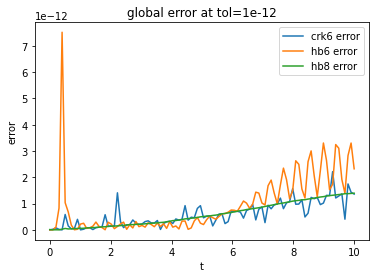

0.0
0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
0.0
4.440892098500626e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
2.220446049250313e-16
2.220446049250313e-16
4.440892098500626e-16
7.105427357601002e-15
3.175237850427948e-14
4.241051954068098e-14
4.907185768843192e-14
5.395683899678261e-14
6.17284001691587e-14
7.549516567451064e-14
8.282263763703668e-14
8.970602038971265e-14
1.0458300891968975e-13
1.1723955140041653e-13
1.2168044349891716e-13
1.4366285938649526e-13
1.4654943925052066e-13
1.5476508963274682e-13
1.6853185513809876e-13
1.8562928971732617e-13
2.000621890374532e-13
2.042810365310288e-13
2.1471713296250527e-13
2.2071233729548112e-13
2.3314683517128287e-13
2.517985819849855e-13
2.615685446016869e-13
2.7000623958883807e-13
2.8688162956314045e-13
3.05089287166993e-13
3.2729374765949615e-13
3.574918139293004e-13
3.7259084706420253e-13
3.921307722976053e-13
4.218847493575595

In [18]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 276
nsuccessful_steps = 215
integration complete


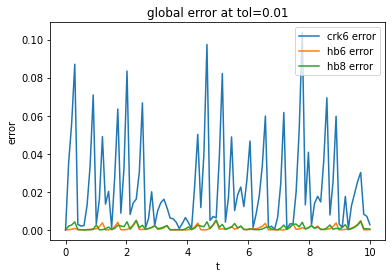

0.0
2.078266595022943e-06
0.0010767596603444562
0.0014150505961916943
0.0018398716336603393
0.0023869600057244422
0.0030966728627096485
0.004022619307269326
0.00032899730263585836
0.00032082767688623726
0.00029371304466729864
0.00024176109554419067
0.0001571836927505288
2.9673151956011168e-05
0.0001544264574524501
0.0004132203510992527
0.0007707258426580266
0.0012588157939071865
0.0019198005776213112
0.0028098583066232807
0.004003591987910005
0.0003287329923508109
0.0007230630654200265
0.0012564799992086373
0.0019739348081924124
0.0029351230768642766
0.004219330508814956
0.0003465471524414232
0.0007897899203904712
0.0013838754228653327
0.0021775196748042847
0.003235431097231789
0.004643566204494576
0.0003813506575919279
0.0008543328573833442
0.001483221709812077
0.002318362751854375
0.003426641077836634
0.004896916822389574
0.00040207604698960786
0.0008740429176349318
0.001496837459832867
0.0023191681604080028
0.0034057570705589013
0.004842602387685635
0.00039752567453477106
0.00083463

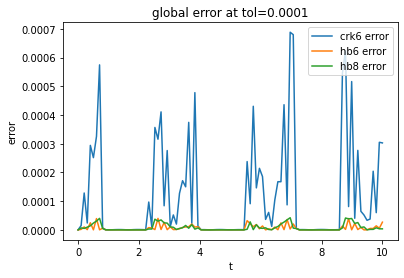

0.0
2.9034334993530142e-08
9.548825006290562e-07
2.614034820339062e-07
7.153841522292148e-06
3.0901776313790874e-06
7.058290345113294e-06
9.859808238865675e-06
1.2460228641375526e-05
1.5011417631827229e-05
1.7533968979022152e-05
2.0027740980088637e-05
2.2489357167976287e-05
2.49149765110257e-05
2.7300734449231534e-05
2.9642815055352933e-05
3.193747560348292e-05
3.418104256325272e-05
3.636992645328352e-05
3.8500626566295715e-05
4.0569734208961705e-05
5.6041218546853955e-06
3.7874318531638806e-05
5.248299178584048e-06
4.0180119369126466e-05
5.5675483764394684e-06
8.946804861409419e-07
2.6591321400371015e-07
1.833517728755396e-07
1.7451100142729103e-07
1.7556853137978834e-07
1.7790241246817828e-07
1.803467273298054e-07
1.8274361190950827e-07
1.850706933259616e-07
1.8732398143761486e-07
1.8950261371220023e-07
1.9160542896745625e-07
1.9363142467199168e-07
1.9558011987719226e-07
1.974507757296351e-07
1.9924226346557106e-07
2.0095407560205558e-07
2.0258547195339816e-07
2.041358941884397e-07
2

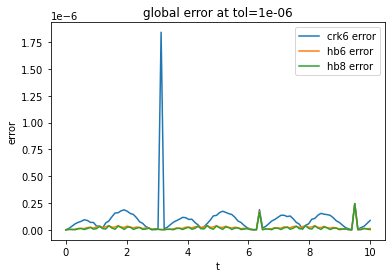

0.0
1.7625739192825285e-16
7.87670709906374e-14
1.849013650523368e-11
2.73700752600331e-09
2.4566123094094117e-09
7.626682033481935e-08
3.1495811549098196e-08
1.0807288869374432e-08
4.673115824860297e-09
3.4327832798553004e-09
3.574563381403273e-09
4.074520457142405e-09
4.661886265910908e-09
5.269322173040436e-09
5.8801286617615744e-09
6.490785936508203e-09
7.100042720420419e-09
7.70727634491486e-09
8.31275007162624e-09
8.916148486193265e-09
9.517111432266745e-09
1.0115620063810837e-08
1.0711544318198207e-08
1.1304876201823078e-08
1.1895196161404442e-08
1.2482488653819956e-08
1.3066559667596067e-08
1.3647448449116695e-08
1.422463069555846e-08
1.4798301861684848e-08
1.5368258055037387e-08
1.5934032482345373e-08
1.649594139063737e-08
1.705357816073061e-08
1.76068327140122e-08
1.8155409842179893e-08
1.8699818360445875e-08
1.9238784565445144e-08
1.977327457325373e-08
2.030245060957725e-08
2.0826660285244714e-08
2.13455239039817e-08
2.1858827525811364e-08
2.2366395291406604e-08
2.2868432592

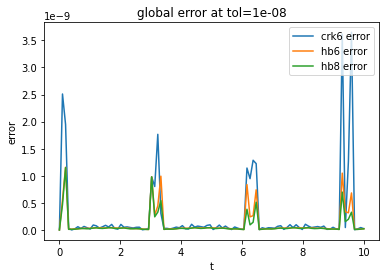

0.0
2.6723889485873176e-19
1.029145030913975e-18
6.3527471044072525e-18
3.2526065174565133e-18
1.1133834739579518e-14
3.05030653513505e-12
4.42371226455629e-12
4.812107309848379e-12
4.660832483849298e-12
2.059997953468562e-10
2.1611458109194182e-10
1.7087085218969733e-10
1.2039621383186372e-10
7.979690519466232e-11
5.1065950079642874e-11
3.215114285914922e-11
6.592502793667521e-10
6.144701969468258e-10
5.882877102125761e-10
6.240376548838356e-10
6.929662260679592e-10
7.752938291361033e-10
8.627552561257801e-10
9.517125698632611e-10
1.0409157980006967e-09
1.1302899727283489e-09
1.2194489029671018e-09
1.3084792693796032e-09
6.939534780148193e-10
3.700721673549623e-10
1.994018838935574e-10
1.095533386230585e-10
6.229844418115249e-11
3.752073651774879e-11
2.4606511273006504e-11
1.7859047574120268e-11
1.4461598585313595e-11
1.2735257293172708e-11
1.198774413069259e-11
1.1708078950789513e-11
1.1704248681354557e-11
1.1784351272581262e-11
1.1998957383241304e-11
1.222077994356141e-11
1.24689147

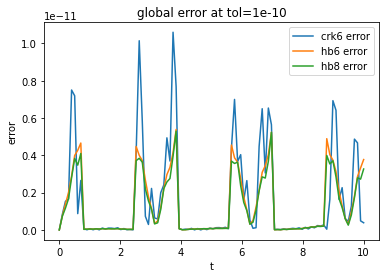

0.0
3.4439168495277775e-19
6.208023584434975e-19
1.5865985893257113e-19
5.916525136571288e-19
2.879912020664621e-20
1.5585406229479126e-18
2.0464316005663896e-18
1.4443199240765647e-15
2.388063705116572e-15
3.232440357048283e-15
3.2528233578910104e-15
3.5600602327212627e-13
5.493079949236979e-13
6.355931406187842e-13
6.588687928577031e-13
6.350735909377292e-13
5.930082813687676e-13
5.316944801103674e-13
4.669112319000135e-13
4.018625709978352e-13
3.473714371704517e-13
2.9299132564553076e-13
2.407518628899652e-13
1.9434454046063365e-13
1.5996232116677334e-13
1.2994466613847067e-13
1.0804551697773945e-13
8.843620280529763e-14
1.3493442474477035e-12
1.6545168013415434e-12
1.575413410837001e-12
1.3718054470146512e-12
1.1687456558107101e-12
9.910822162950694e-13
8.63142890494828e-13
7.871342466714282e-13
7.459172168822192e-13
7.298051052373467e-13
7.37257477290143e-13
7.674832991355629e-13
7.797373857698631e-13
8.290451658510278e-13
8.747030877387374e-13
8.926193117986259e-13
9.289513602794

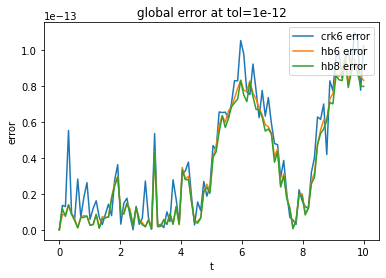

0.0
4.309400577332956e-19
2.277998538303925e-19
7.083354380444714e-19
2.0198592505687362e-19
3.900322024310036e-20
1.2086101366134798e-19
5.753471294224835e-19
6.018169090241804e-19
9.978048118655658e-19
1.1600963245594897e-17
1.4905069366244472e-16
1.7114131292683687e-16
8.359198749863239e-17
1.235990476633475e-17
3.161533534967731e-16
6.418476861114186e-16
4.102621020685149e-16
1.5352302762394743e-16
5.772292366312826e-16
7.407269242420966e-16
1.2437967322753707e-15
1.0798653637955624e-15
1.205632815803881e-15
1.4545656346065527e-15
1.4779844015322396e-15
1.986258379993444e-15
2.8015784137025435e-15
3.4122010772463796e-15
2.9472951856845953e-15
2.5153490401663703e-15
3.2421981766006525e-15
3.5388358909926865e-15
3.596081765699921e-15
3.958638972179074e-15
3.774758283725532e-15
3.3237301799715624e-15
3.101685575046531e-15
3.4243441415782172e-15
3.389649672058681e-15
3.427813588530171e-15
3.5180192092809648e-15
3.670674875166924e-15
4.3923198411732756e-15
4.198030811863873e-15
4.430483

In [19]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 457
nsuccessful_steps = 290
integration complete


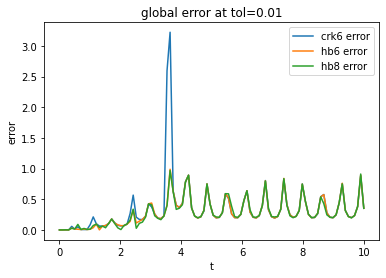

0.0
1.9917895017762532e-06
0.00011975440362910206
0.015752178927227245
0.006844025366576023
0.007245826150873214
0.010794783205526626
0.10541201167312297
0.0628807870230581
0.09494255035787003
0.16821405160503455
0.17218092004928864
0.09764620950648406
0.0635058508294355
0.10739682665757111
0.3103076155843889
0.16433427974646175
0.2462807099186588
0.5026761205408116
0.57282687095225
0.3060195684780871
0.2039367916500443
0.20525261601280986
0.3109798479755268
0.9164328741336875
0.6933449546367556
0.5029516591122576
0.3773259762662624
0.49357678255324755
0.670425839005498
0.8657773450392547
1.0810336559749063
1.2094394366426053
1.1579285009505471
1.208130121593794
1.2488051123087975
1.2396013351656636
1.1920832777201615
1.2305543998793553
1.169804339728791
1.2572869754528424
1.2585357733382596
1.274745120161177
1.3296648144564076
1.2754123160381419
1.214016548686348
1.248919212847852
1.2495219751107522
1.2618313985619773
1.266822614649667
1.283176611999332
1.2141986021003521
1.2306286433

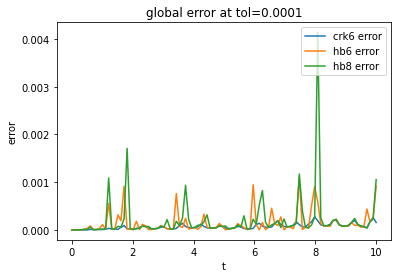

0.0
1.9539925233402755e-14
3.043787444312329e-12
4.909694872878845e-10
5.8391890878084496e-08
8.072454837915188e-08
9.690306423948414e-08
3.5242820350944726e-07
4.700649036681881e-07
4.648086380232286e-07
5.1335006912012204e-08
3.435976725363332e-08
8.497730334511289e-06
7.191333523781651e-06
6.8100468029186345e-06
7.3768841328814005e-06
9.283543769278424e-06
1.275373040421357e-05
1.5575519522581516e-05
1.6615253674689967e-05
1.4504152791028346e-05
2.3026015511184994e-05
1.8471897680338856e-05
1.6590853515019433e-05
1.7088213021487775e-05
2.8318062069931926e-05
3.5406378482649714e-05
5.487788381786096e-05
3.005400454281215e-05
1.8344891945520914e-05
1.5393919440942483e-05
1.5043040422657583e-05
5.119307727863287e-05
6.287576540664475e-05
7.848869833582128e-05
8.971475255870054e-05
8.280422080009231e-05
6.71166979395732e-05
3.520274281498814e-05
2.782016848890123e-05
2.5881281228379294e-05
2.7712783306377275e-05
3.455601627688765e-05
5.186174888405226e-05
6.40922370329644e-05
6.92382268

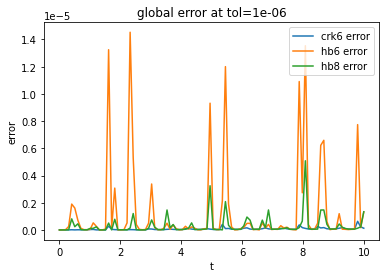

0.0
0.0
8.881784197001252e-16
3.552713678800501e-15
6.217248937900877e-15
3.9035441545820504e-13
7.755973641110359e-11
1.1235723462732494e-10
1.3379919394651552e-10
1.5150902754612616e-10
1.69869895927377e-10
1.9209833723721204e-10
2.222981798638557e-10
2.682698507783243e-10
3.490905342573569e-10
5.162212879383787e-10
8.118370420362453e-10
1.9469825751627923e-10
5.543534520313642e-09
5.617607712338213e-09
5.3240230002415956e-09
4.914960438640037e-09
1.1999314875055234e-09
7.244518318572091e-09
9.661260680360328e-09
9.301966752417457e-09
8.570611331748523e-09
7.971110882465382e-09
7.56099449716885e-09
7.327004336588061e-09
7.254448597393548e-09
7.3392856236864645e-09
7.591216100166776e-09
8.037187360088183e-09
8.727899736271638e-09
9.752281870945012e-09
2.0459049343557467e-08
2.5182249618893593e-08
3.524018588052513e-08
3.679750659735248e-08
3.6930124958090005e-08
3.5692350630611713e-08
1.8128621714907922e-08
9.779016485467196e-09
4.116516016949845e-09
2.4817343735605846e-09
1.928365467

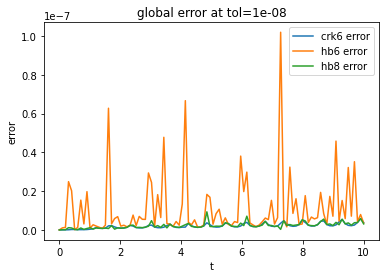

0.0
0.0
4.440892098500626e-16
0.0
0.0
4.440892098500626e-16
2.220446049250313e-15
6.217248937900877e-15
4.4853010194856324e-14
1.4553691585206252e-11
2.1688428830657358e-11
2.6000535058301466e-11
2.922062591892427e-11
3.211431121030728e-11
3.5132785569658154e-11
3.8619329956190995e-11
4.2948311573809406e-11
4.870948089319427e-11
5.700684369003284e-11
7.015632519369319e-11
7.365952292559541e-11
7.774314525477166e-11
8.24866841497851e-11
1.4760859201601306e-10
1.5901524541561685e-10
1.7188250822641749e-10
1.8588020012089146e-10
1.9971690967679478e-10
2.1240587066984062e-10
2.275832855502813e-10
2.3180635189135046e-10
2.3491186773583195e-10
2.3673396576384675e-10
2.3715540642399446e-10
2.361248974125374e-10
2.3366197865470895e-10
2.2991031300989562e-10
2.3015989114583135e-10
2.169686652564451e-10
2.041018465348543e-10
1.9320256505750422e-10
1.8288481840045279e-10
1.7267720586744417e-10
1.6289813942194087e-10
1.5378809337107668e-10
1.4557421934568993e-10
1.382627345947185e-10
1.31842536887

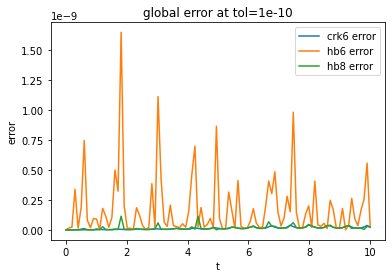

0.0
0.0
4.440892098500626e-16
0.0
4.440892098500626e-16
0.0
0.0
0.0
8.881784197001252e-16
8.881784197001252e-16
7.993605777301127e-15
1.3766765505351941e-14
1.6431300764452317e-14
3.1530333899354446e-14
3.907985046680551e-14
4.618527782440651e-14
4.929390229335695e-14
5.1958437552457326e-14
5.46229728115577e-14
5.3290705182007514e-14
5.684341886080802e-14
5.773159728050814e-14
5.10702591327572e-14
5.062616992290714e-14
4.929390229335695e-14
4.618527782440651e-14
4.529709940470639e-14
4.440892098500626e-14
4.39648317751562e-14
4.529709940470639e-14
4.440892098500626e-14
4.529709940470639e-14
4.884981308350689e-14
4.973799150320701e-14
5.861977570020827e-14
5.5067062021407764e-14
6.88338275267597e-14
8.08242361927114e-14
8.79296635503124e-14
8.748557434046234e-14
1.0147438445073931e-13
1.2523315717771766e-13
1.3655743202889425e-13
1.1901590823981678e-13
1.0413891970983968e-13
4.107825191113079e-14
5.5289106626332796e-14
2.0539125955565396e-13
2.0117241206207837e-13
1.9606538614880265e-13

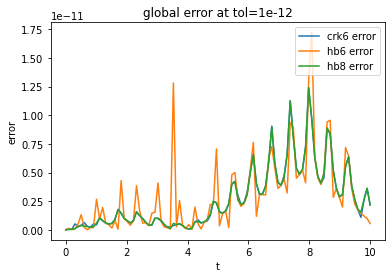

0.0
0.0
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
8.881784197001252e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
1.3322676295501878e-15
8.881784197001252e-16
4.440892098500626e-15
8.881784197001252e-15
8.43769498715119e-15
1.021405182655144e-14
1.1102230246251565e-14
1.4210854715202004e-14
1.509903313490213e-14
1.687538997430238e-14
1.9539925233402755e-14
2.220446049250313e-14
2.4424906541753444e-14
2.6645352591003757e-14
2.886579864025407e-14
2.9753977059954195e-14
2.9753977059954195e-14
3.197442310920451e-14
3.375077994860476e-14
3.5083047578154947e-14
3.597122599785507e-14
3.6415315207705135e-14
3.730349362740526e-14
3.774758283725532e-14
3.730349362740526e-14
3.730349362740526e-14
3.730349362740526e-14
3.774758283725532e-14
3.863576125695545e-14
3.863576125695545e-14
3.863576125695545e-14
3.9968028886505635e-14
4.04121180963557e-14
4.085620730620576e-14
4.1300296516055823e-14
4.174438572590

In [20]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 7
nsuccessful_steps = 7
integration complete


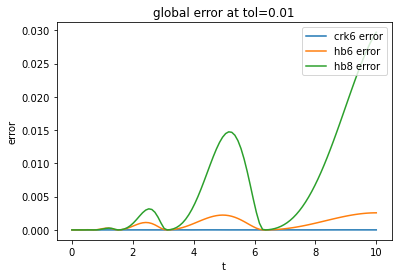

0.0
5.3734794391857577e-14
2.0594637106796654e-13
2.4791280139879746e-13
1.210864741807427e-12
7.392142453710449e-13
8.367195825087492e-13
1.066202681698769e-12
nsteps = 11
nsuccessful_steps = 11
integration complete


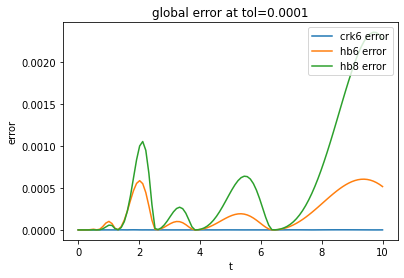

0.0
1.2212453270876722e-15
4.773959005888173e-15
1.0769163338864018e-14
1.9095836023552692e-14
1.6930901125533637e-13
4.82502926502093e-13
7.340794638821535e-13
1.1169398739241387e-12
1.075112221471386e-12
7.87897525000858e-13
5.881684028707923e-13
nsteps = 19
nsuccessful_steps = 19
integration complete


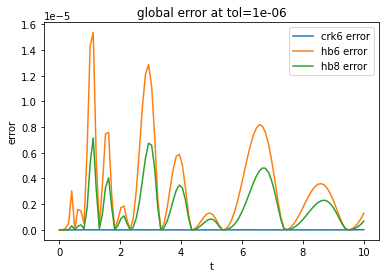

0.0
2.220446049250313e-16
3.3306690738754696e-16
5.551115123125783e-16
1.1102230246251565e-15
1.6653345369377348e-15
7.105427357601002e-15
2.4646951146678475e-14
1.333377852574813e-13
3.6270986214503864e-13
5.273559366969494e-13
7.782663402622347e-13
7.173706073615449e-13
6.285527653915324e-13
6.075695502261169e-13
6.094291737923641e-13
5.608291608893978e-13
5.177386297461339e-13
4.1600056732704616e-13
4.0310810245358653e-13
nsteps = 44
nsuccessful_steps = 35
integration complete


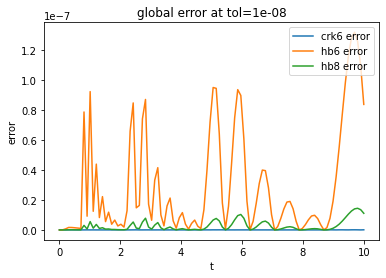

0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
5.551115123125783e-16
9.992007221626409e-16
6.8833827526759706e-15
2.7755575615628914e-14
5.972999872483342e-14
6.117328865684613e-14
1.0158540675320182e-13
1.071365218763276e-13
1.1679546219056647e-13
1.2589929099249275e-13
1.673106098110111e-13
1.8274270985330077e-13
1.8812729152273278e-13
2.081113059659856e-13
2.0439205883349132e-13
2.0794477251229182e-13
2.1443957720634899e-13
2.1327384303049257e-13
2.3753221611855224e-13
2.233768725545815e-13
2.1069257449823908e-13
1.956490525145682e-13
1.919020498064583e-13
1.849909114781667e-13
1.7838508448164703e-13
1.690592110747957e-13
1.5501488981328748e-13
1.5219769888830115e-13
1.429273366326811e-13
nsteps = 90
nsuccessful_steps = 67
integration complete


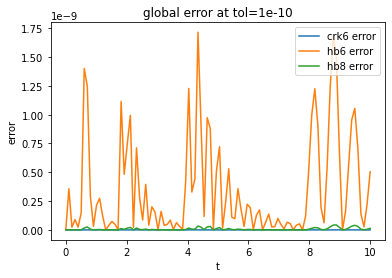

0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
2.220446049250313e-16
4.440892098500626e-16
8.881784197001252e-16
3.552713678800501e-15
8.548717289613705e-15
2.142730437526552e-14
2.5868196473766147e-14
3.297362383136715e-14
4.085620730620576e-14
4.207745263329343e-14
4.3520742565306136e-14
4.707345624410664e-14
5.1958437552457326e-14
5.1736392947532295e-14
5.67323965583455e-14
7.505107646466058e-14
8.026912468039882e-14
8.104628079763643e-14
8.149037000748649e-14
8.071321389024888e-14
8.104628079763643e-14
7.72715225139109e-14
8.176792576364278e-14
8.321121569565548e-14
8.337774914934926e-14
8.493206138382448e-14
8.576472865229334e-14
8.443246102274315e-14
8.198997036856781e-14
8.287814878826794e-14
8.83182416089312e-14
8.604228440844963e-14
8.665290707199347e-14
8.715250743307479e-14
8.854028621385623e-14
8.881784197001252e-14
8.748557434046234e-14
8.72635297355373e-14
8.767986336977174e-14
8.684719610130287e-14
8.359979

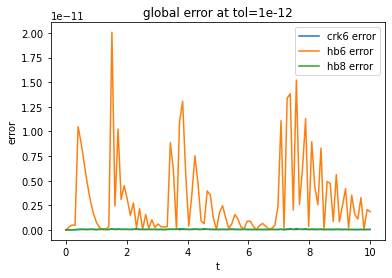

0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
5.551115123125783e-16
2.220446049250313e-15
3.4416913763379853e-15
5.329070518200751e-15
7.66053886991358e-15
8.548717289613705e-15
1.0658141036401503e-14
1.176836406102666e-14
1.2434497875801753e-14
1.4210854715202004e-14
1.6209256159527285e-14
1.6542323066914832e-14
1.7208456881689926e-14
1.7763568394002505e-14
1.8762769116165146e-14
1.9872992140790302e-14
2.042810365310288e-14
2.1094237467877974e-14
2.2315482794965646e-14
2.3203661214665772e-14
2.8310687127941492e-14
3.275157922644212e-14
3.297362383136715e-14
3.26405569239796e-14
3.4861002973229915e-14
3.574918139293004e-14
3.608224830031759e-14
3.8746783559417963e-14
4.0523140398818214e-14
4.030109579389318e-14
4.0745185003743245e-14
4.030109579389318e-14
4.0967229608668276e-14
4.1744385725905886e-14
4.20774

In [21]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 10
nsuccessful_steps = 8
integration complete


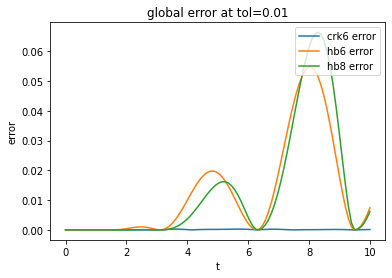

0.0
1.1102230246251565e-16
6.106226635438361e-14
1.3718803870688134e-11
1.3345106686379893e-09
7.052057672263246e-07
5.752732522334991e-05
6.535932050077964e-06
3.469012774331981e-05
nsteps = 17
nsuccessful_steps = 14
integration complete


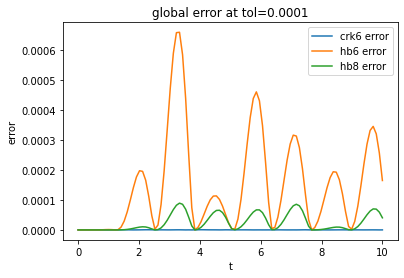

0.0
0.0
0.0
4.440892098500626e-16
1.4432899320127035e-15
1.9984014443252818e-15
2.2822854717219343e-12
3.2875407951493685e-10
7.662430312471713e-08
2.0110232701320285e-07
1.8484646455152465e-07
6.313651168543544e-08
7.71964020485072e-10
4.793226365817915e-08
1.1030141991441589e-07
nsteps = 40
nsuccessful_steps = 26
integration complete


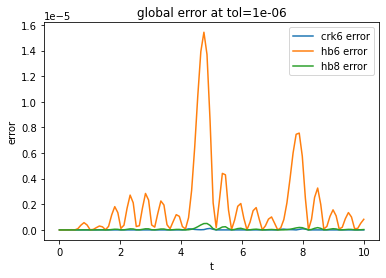

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-15
1.5543122344752192e-15
3.7569947153315297e-13
7.460493334221496e-11
8.880701729552243e-11
4.694700184160183e-11
3.370892454057639e-11
1.2773970770041387e-10
2.0932722222255506e-10
2.5817525894922255e-10
7.502828913708015e-10
7.668315982201079e-10
7.978204763503527e-10
8.240105819901089e-10
8.297199038942438e-10
1.0636438674271886e-09
9.736720318898051e-10
8.751901980907917e-10
7.822149039604653e-10
7.065298346375926e-10
nsteps = 77
nsuccessful_steps = 49
integration complete


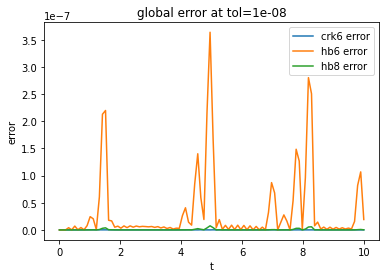

0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
6.139533326177116e-14
9.625633623500107e-14
1.0869083411080283e-13
7.783718114495741e-12
7.311082295125004e-12
7.1020134218002795e-12
6.886768932901077e-12
6.69930777519312e-12
6.494027537939928e-12
6.306954958290589e-12
6.114664330425512e-12
5.932254687479599e-12
5.758726828730687e-12
5.601075159233915e-12
5.469180663908446e-12
5.3458903970238225e-12
1.4215850718812817e-12
2.2277579087015553e-12
2.3804846982500294e-12
2.385536213012074e-12
2.4104607199149086e-12
2.4246160634788794e-12
2.4438229218048946e-12
2.4555912858659212e-12
2.4625856909210597e-12
2.458810932637334e-12
2.445432745190601e-12
9.701628389535699e-12
1.2768397450457769e-11
1.153573764289817e-11
6.6077698868127754e-12
6.447453682056903e-12
6.294686993868481e-12
6.142475417192372e-12
5.998757046654646e-12
5.858924456703107e-12
5.72486502647962

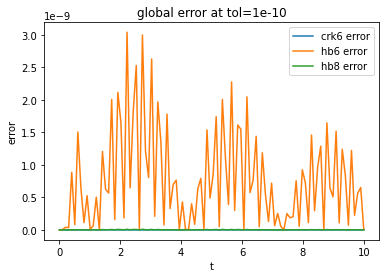

0.0
0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
4.440892098500626e-16
1.1102230246251565e-16
3.3306690738754696e-16
1.1102230246251565e-15
2.3314683517128287e-15
1.1102230246251565e-16
4.773959005888173e-15
2.55351295663786e-15
2.653433028854124e-14
5.218048215738236e-14
6.142308883738679e-14
7.854827899222983e-14
8.215650382226158e-14
1.0680345496894006e-13
1.191269305422793e-13
1.4194201369832626e-13
1.582067810090848e-13
1.8285373215576328e-13
1.9939605522267811e-13
2.1371793224034263e-13
2.240430063693566e-13
2.3314683517128287e-13
2.3780977187470853e-13
2.362554596402333e-13
2.3525625891807067e-13
2.2948309919001986e-13
2.170486013142181e-13
2.0855539517583566e-13
1.954547634852588e-13
1.6583956430338276e-13
1.513927871954479e-13
1.3508638652126592e-13
1.1818324097134791e-13
1.0955125695488732e-13
9.203748874142548e-1

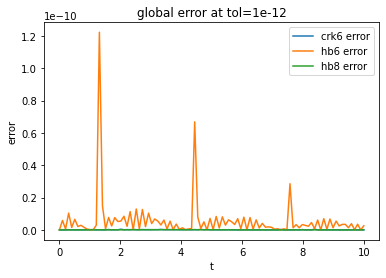

0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
8.881784197001252e-16
2.1094237467877974e-15
3.774758283725532e-15
3.6637359812630166e-15
4.218847493575595e-15
6.772360450213455e-15
1.0103029524088925e-14
1.2212453270876722e-14
1.3655743202889425e-14
1.8096635301390052e-14
2.1760371282653068e-14
2.298161660974074e-14
2.5868196473766147e-14
3.0309088572266774e-14
3.214095656289828e-14
3.1308289294429414e-14
3.241851231905457e-14
3.452793606584237e-14
4.4853010194856324e-14
4.925226892993351e-14
5.059841434729151e-14
5.343230198573412e-14
5.683647996690411e-14
5.698219673888616e-14
6.353251258417458e-14
6.689093723366568e-14
6.838973831690964e-14
7.238654120556021e-14
7.69939667577546e-14
8.304468224196171e-14
8.720801858430605e-14
9.120482147295661e-14
9.559020242022598e-14
9.803269307440132e-14
1.0225154056797692e-13
1.0613732115416497e-13
1.0902390101819037e-13
1.13242748

In [22]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 10
nsuccessful_steps = 9
integration complete


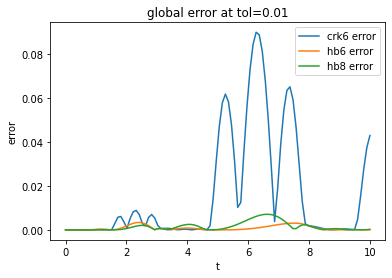

0.0
1.1195044891110228e-11
2.557632994282244e-09
3.782060776780227e-07
2.325434762029399e-05
0.0006714833121908015
6.2049195940439e-05
0.0022693834433060722
0.00011703658363071412
0.0016055002309327548
nsteps = 16
nsuccessful_steps = 14
integration complete


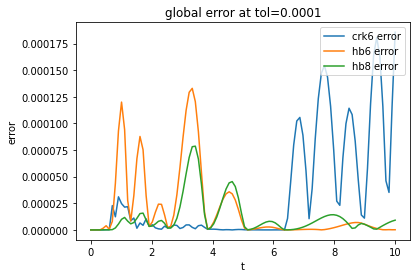

0.0
4.6629367034256575e-15
9.769962616701378e-15
7.738254481637341e-14
1.7706947019746622e-12
3.8602987473268513e-10
6.73014564633867e-08
6.0597235027048946e-06
3.364349715595516e-06
1.4023527727946572e-06
6.195544561826694e-07
8.736442369539077e-08
9.797662681165775e-09
5.84061449515616e-06
9.786314094206716e-06
nsteps = 29
nsuccessful_steps = 25
integration complete


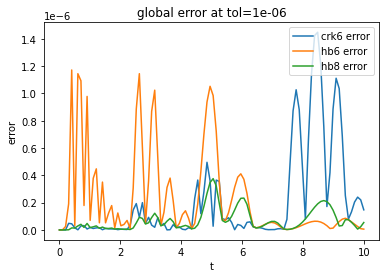

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-15
3.774758283725532e-15
1.1102230246251565e-14
3.6637359812630166e-14
2.8332891588433995e-13
6.572031807650092e-11
1.3217249739128079e-08
1.581814385032132e-08
1.4212168220062438e-08
1.135320826239905e-08
8.503444948182448e-09
6.114281192459714e-09
4.274430254191941e-09
2.9271103318961877e-09
4.421187060899001e-08
3.137764803540222e-08
1.6834628135953267e-08
8.046827426611003e-09
6.042893874180777e-08
1.5430116739878486e-08
2.9711539895060923e-09
7.919807654133137e-08
1.684867534379464e-08
nsteps = 58
nsuccessful_steps = 46
integration complete


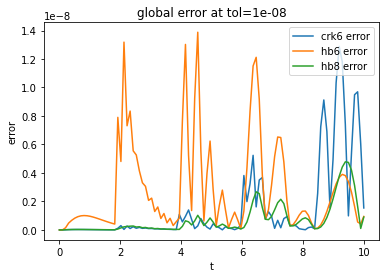

0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
5.551115123125783e-16
1.7763568394002505e-15
2.886579864025407e-15
1.4210854715202004e-14
2.55351295663786e-14
1.1040168779175019e-11
1.8026469206233742e-11
2.2029933433032056e-11
2.3821222772113515e-11
2.4214741323191902e-11
2.3654300740361123e-11
2.245775787557136e-11
2.0877466422319912e-11
1.9102941450910293e-11
1.725364295879217e-11
1.5435153155607395e-11
1.3679057886406554e-11
1.2023160245178133e-11
1.0554890295111363e-11
9.16144937690433e-12
7.931322265619656e-12
6.8302030697964256e-12
9.86144499393049e-11
1.2773804236587694e-10
1.260398452274103e-10
1.111735148384696e-10
9.190381788926061e-11
7.261458101481821e-11
5.6130211589788814e-11
4.223843497186408e-11
3.125455450003756e-11
2.254196829198918e-11
3.5069636084017475e-10
3.037690099461088e-10
2.000781762490078e-10
1.1614931239023463e-10
6.30846486160408e-11
7.620539754782385e-10
2.88298718231772e-10
7.897238418763664e-11
9.41182

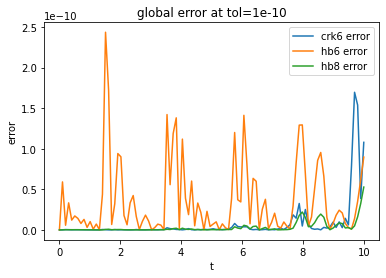

0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
2.220446049250313e-16
0.0
3.3306690738754696e-16
5.10702591327572e-15
1.2878587085651816e-14
1.0480505352461478e-13
1.4577228313328305e-13
1.723066134218243e-13
1.9051427102567686e-13
2.1793677973391823e-13
2.425837308805967e-13
2.3092638912203256e-13
2.3425705819590803e-13
2.3792079417717105e-13
2.3675506000131463e-13
2.1910251390977464e-13
2.2526425169644426e-13
2.128297538206425e-13
2.0383694732117874e-13
1.919020498064583e-13
1.8279822100453202e-13
1.7158496845581794e-13
1.6131540547803525e-13
1.499356194756274e-13
1.3777867735598193e-13
1.2567724638756772e-13
1.1579626146840383e-13
1.0663692151524629e-13
9.575673587391975e-14
8.304468224196171e-14
7.072120666862247e-14
5.312417172831374e-14
4.440892098500626e-14
3.097522238704187e-14
2.914335439641036e-14
2.170486013142181e-14
1.1324274851176597e-14
9.43689570931383e-15
1.0791367799356522e-13
1.7852386235972517e-13
2.0661250488274163e-13
2.103

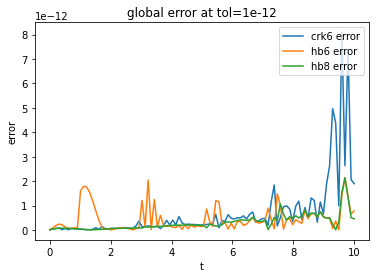

0.0
0.0
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
1.2212453270876722e-15
3.552713678800501e-15
1.4654943925052066e-14
1.6209256159527285e-14
2.042810365310288e-14
2.9531932455029164e-14
3.497202527569243e-14
3.8968828164342995e-14
4.5630166312093934e-14
4.729550084903167e-14
4.807265696626928e-14
5.1736392947532295e-14
5.573319583618286e-14
6.006306563222097e-14
6.17284001691587e-14
6.117328865684613e-14
6.339373470609644e-14
6.683542608243442e-14
7.038813976123492e-14
7.538414337204813e-14
7.815970093361102e-14
7.716050021144838e-14
7.627232179174825e-14
7.527312106958561e-14
7.394085344003543e-14
7.30526750203353e-14
7.260858581048524e-14
7.194245199571014e-14
7.077671781985373e-14
6.999956170261612e-14
6.84452494681409e-14
6.677991493120317e-14
6.544764730165298e-14
6.572520305780927e-14
6.611378111642807e-14
6.589173651150304e-14
6.

In [23]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [24]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)